# Product forcasting

In [26]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import math
pd.set_option("display.max_columns", 101)
from sklearn import preprocessing, metrics, linear_model
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
import calendar

## Data Wrangling & Visualization

In [2]:
# The dataset is already loaded below
data = pd.read_csv("train.csv")

In [3]:
data.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76


In [4]:
#Explore columns
data.columns

Index(['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel',
       'Product Size', 'Product Type', 'Month of Sourcing', 'Sourcing Cost'],
      dtype='object')

In [5]:
#Description
data.describe()

,Sourcing Cost
count,550176.000000
mean,108.817286
std,104.390093
min,-196.070000
25%,57.000000
50%,132.000000
75%,146.150000
max,32632.500000


In [6]:
#Showing shape of the dataframe
data.shape

(550176, 8)

In [7]:
#Showing data types of dataframe
data.dtypes

ProductType           object
Manufacturer          object
Area Code             object
Sourcing Channel      object
Product Size          object
Product Type          object
Month of Sourcing     object
Sourcing Cost        float64
dtype: object

In [8]:
# check columns with data type object
col_list = [c for c in data.columns if data[c].dtype == 'object' and c != 'timestamp']
print(col_list)

['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type', 'Month of Sourcing']


In [9]:
#Checking null are available in dataframe columns
data.isnull().sum()

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64

In [10]:
#pre-processing the data.

print(data['ProductType'].unique())
print(data['Manufacturer'].unique())
print(data['Area Code'].unique())
print(data['Sourcing Channel'].unique())
print(data['Product Size'].unique())
print(data['Product Type'].unique())
print(data['Month of Sourcing'].unique())

['NTM3' 'NTM2' 'NTM1']
['X1' 'X2' 'X3']
['A28' 'A9' 'A20' 'A18' 'A10' 'A19' 'A29' 'A7' 'A2' 'A8' 'A4' 'A6' 'A30'
 'A35' 'A44' 'A45' 'A31' 'A25' 'A37' 'A32' 'A34' 'A46' 'A11' 'A39' 'A41'
 'A17' 'A38' 'A5' 'A22' 'A3' 'A12' 'A24' 'A36' 'A42' 'A14' 'A43' 'A33'
 'A15' 'A40' 'A21' 'A16' 'A13' 'A1' 'A23' 'A26']
['WHOLESALE' 'DIRECT' 'RETAIL' 'ECOM']
['Large' 'Small' 'ExtraLarge']
['Powder' 'Liquid']
['May-21' 'Oct-20' 'Dec-20' 'Feb-21' 'Nov-20' 'Sep-20' 'Mar-21' 'Jan-21'
 'Apr-21' 'Jul-20' 'Aug-20']


In [11]:
data['source_year'] = data['Month of Sourcing'].str.split('-').str[1]
data['source_month'] = data['Month of Sourcing'].str.split('-').str[0]
data = data.drop(['Month of Sourcing'], axis=1)

In [12]:
abbr_to_num = {name: num for num, name in enumerate(calendar.month_abbr) if num}

In [13]:
le = preprocessing.LabelEncoder()
data['ProductType']  = le.fit_transform(data['ProductType'])
data['Manufacturer']  = le.fit_transform(data['Manufacturer'])
data['Area Code']  = le.fit_transform(data['Area Code'])
data['Sourcing Channel']  = le.fit_transform(data['Sourcing Channel'])
data['Product Size']  = le.fit_transform(data['Product Size'])
data['Product Type']  = le.fit_transform(data['Product Type'])
data['source_month'] = data['source_month'].apply(lambda x : abbr_to_num[x])
data['source_year'] = data['source_year'].astype('int32')

## Visualization, Modeling, Machine Learning

In [14]:
#Loading Test data
test_data=pd.read_csv('test.csv')

In [15]:
test_data.isnull().sum()
test_data.shape

(96, 8)

In [16]:
test_data.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM1,X1,A1,DIRECT,Small,Powder,Jun-21,103.68
1,NTM1,X1,A10,DIRECT,Large,Powder,Jun-21,155.75
2,NTM1,X1,A10,ECOM,Large,Powder,Jun-21,143.02
3,NTM1,X1,A11,DIRECT,Large,Powder,Jun-21,139.39
4,NTM1,X1,A2,DIRECT,Large,Powder,Jun-21,169.42


In [17]:
test_data['source_year'] = test_data['Month of Sourcing'].str.split('-').str[1]
test_data['source_month'] = test_data['Month of Sourcing'].str.split('-').str[0]
test_data = test_data.drop(['Month of Sourcing'], axis=1)

In [18]:
# converting to categorical data as per train dataset
test_data['ProductType']  = le.fit_transform(test_data['ProductType'])
test_data['Manufacturer']  = le.fit_transform(test_data['Manufacturer'])
test_data['Area Code']  = le.fit_transform(test_data['Area Code'])
test_data['Sourcing Channel']  = le.fit_transform(test_data['Sourcing Channel'])
test_data['Product Size']  = le.fit_transform(test_data['Product Size'])
test_data['Product Type']  = le.fit_transform(test_data['Product Type'])
test_data['source_month'] = test_data['source_month'].apply(lambda x : abbr_to_num[x])
test_data['source_year'] = test_data['source_year'].astype('int32')

In [19]:
test_data

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Sourcing Cost,source_year,source_month
0,0,0,0,0,2,1,103.68,21,6
1,0,0,1,0,1,1,155.75,21,6
2,0,0,1,1,1,1,143.02,21,6
3,0,0,2,0,1,1,139.39,21,6
4,0,0,11,0,1,1,169.42,21,6
...,...,...,...,...,...,...,...,...,...
91,2,0,37,0,2,0,89.57,21,6
92,2,0,43,0,1,1,114.57,21,6
93,2,0,43,0,2,1,111.26,21,6
94,2,1,12,0,1,1,32.32,21,6


**Identifying the most important features of the model for management.**


In [20]:
corre_metrics = data[['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type', 'Sourcing Cost']].corr()
corre_metrics

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Sourcing Cost
ProductType,1.000000,-0.153839,-0.148129,0.288780,0.076104,-0.075945,-0.134049
Manufacturer,-0.153839,1.000000,0.052805,0.265495,-0.131188,0.010230,-0.221669
Area Code,-0.148129,0.052805,1.000000,-0.019850,-0.122287,-0.075162,0.087674
Sourcing Channel,0.288780,0.265495,-0.019850,1.000000,-0.094251,0.084381,-0.064859
Product Size,0.076104,-0.131188,-0.122287,-0.094251,1.000000,0.159985,-0.013514
Product Type,-0.075945,0.010230,-0.075162,0.084381,0.159985,1.000000,0.072291
Sourcing Cost,-0.134049,-0.221669,0.087674,-0.064859,-0.013514,0.072291,1.000000


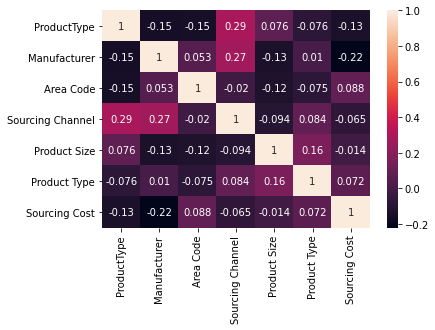

In [21]:
sb.heatmap(corre_metrics, annot=True)
plt.show()

IndexError: index 6 is out of bounds for axis 0 with size 6

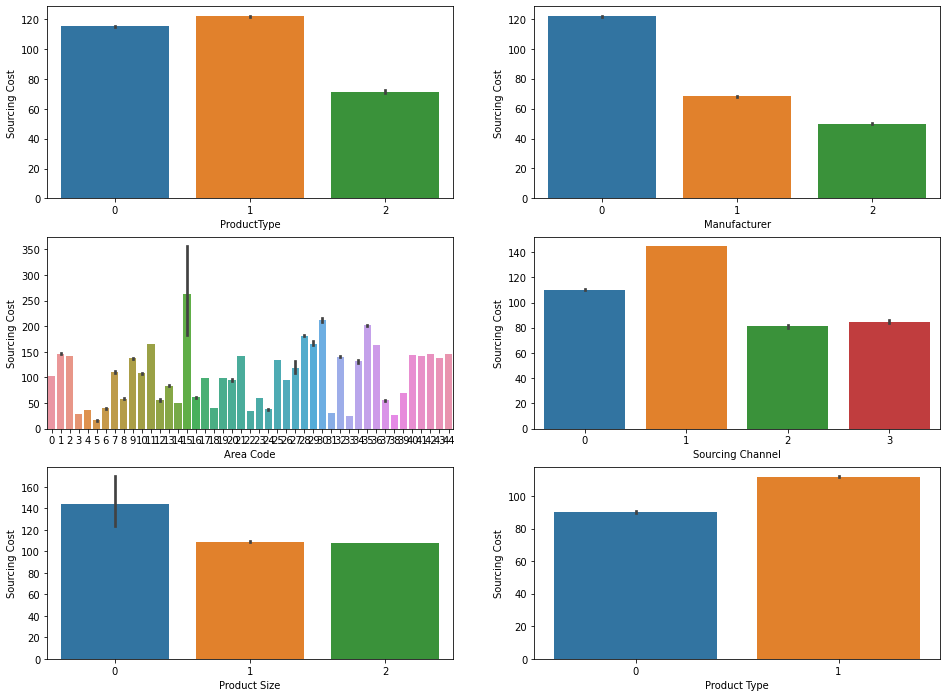

In [22]:
# bar plots for categorical features
cols = [col for col in data.columns if 'Sourcing Cost' not in col]
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
for i, c in enumerate(cols):
    ax = axes.ravel()[i]
    sb.barplot(x=c, y="Sourcing Cost", ax=ax, data=data)

Trying Linear Regression model

In [29]:
#Split input variable and output variable.
X = data[[col for col in data.columns if 'Sourcing Cost' not in col]]
Y = data['Sourcing Cost']

In [30]:
X

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,source_year,source_month
0,2,0,19,3,1,1,21,5
1,1,0,44,0,1,1,20,10
2,2,1,12,0,1,1,20,12
3,2,0,9,3,2,1,21,2
4,1,0,19,0,1,0,20,11
...,...,...,...,...,...,...,...,...
550171,1,0,40,0,1,1,20,7
550172,2,0,5,0,1,0,20,10
550173,1,0,40,0,2,1,21,3
550174,1,0,42,0,2,1,21,2


In [31]:
Y

0          10.16
1         134.28
2          12.46
3         107.22
4         197.76
           ...  
550171    136.47
550172     72.56
550173    147.64
550174    150.04
550175    139.42
Name: Sourcing Cost, Length: 550176, dtype: float64

In [32]:
#Spliting train test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

#Reseting the index for trian and test
x_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

x_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

feature: ProductType = 0.1811122912937484
feature: Manufacturer = 0.14879059065684622
feature: Area Code = 0.25888555427968923
feature: Sourcing Channel = 0.05110688127323066
feature: Product Size = 0.0782799042861839
feature: Product Type = 0.013172351130486074
feature: source_year = 0.03395704795906042
feature: source_month = 0.2346953791207551


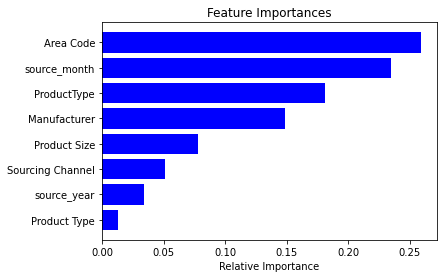

In [33]:
# important features for random forest regression
# train random forest regression model
randomf = RandomForestRegressor(n_estimators=1000, max_depth=8)
randomf.fit(x_train, y_train)
for name, importance in zip(X.columns, randomf.feature_importances_):
    print('feature:', name, "=", importance)
importances = randomf.feature_importances_
indices = np.argsort(importances)
features = X.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [34]:
x_train

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,source_year,source_month
0,1,1,38,0,1,1,20,10
1,0,0,1,0,1,1,20,9
2,1,0,10,0,1,1,20,10
3,0,0,42,1,2,1,21,1
4,0,1,38,0,1,1,20,12
...,...,...,...,...,...,...,...,...
385118,2,0,9,3,2,1,20,10
385119,0,0,2,0,1,1,21,1
385120,0,0,2,0,1,1,21,5
385121,2,0,9,3,2,1,20,10


In [35]:
y_train

0          26.94
1         138.52
2         115.32
3         142.76
4          27.22
           ...  
385118    104.90
385119    144.57
385120    144.37
385121    104.08
385122     68.88
Name: Sourcing Cost, Length: 385123, dtype: float64

In [36]:
# trying with linear regression

lr_model = linear_model.LinearRegression()
lr_model

LinearRegression()

In [37]:
lr_model.fit(x_train, y_train)

LinearRegression()

In [38]:
#print accuracy for model and coefficants.
lr = lr_model.score(x_train, y_train)
print('model accuracy', lr)
print('model coefficiants', lr_model.coef_)
print('model coefficiants', lr_model.intercept_)

model accuracy 0.07809407836730042
model coefficiants [-23.40344999 -58.90209968   0.57968392   6.22902205  -7.39261971
  20.97911796  15.3281882    0.81724742]
model coefficiants -197.8776205364466


In [39]:
predict = cross_val_predict(lr_model, x_train, y_train, cv=3)
predict

array([ 70.05770083, 130.5129653 , 112.97465997, ..., 142.90466973,
        99.90960435, 107.81291323])

In [40]:
# Calculating r-sequard and mean sequared metrics to finalize the model.

r2_score = cross_val_score(lr_model, x_train, y_train, cv=3)
print('R2 score', np.average(r2_score))

R2 score 0.08698151702854957


In [41]:
#model performance on test data.

lr_pred = lr_model.predict(x_test)
lr_pred

array([121.41366021, 141.47097383,  80.93541873, ..., 103.70683362,
       140.65372641,  74.09931538])

In [42]:
rmse = math.sqrt(metrics.mean_squared_error(y_test, lr_pred))
mae = metrics.mean_absolute_error(y_test, lr_pred)
r2_score = metrics.r2_score(y_test, lr_pred)

print(r2_score)
print('rmse', rmse)
print('mae', mae)

0.1825244363313191
rmse 67.81730372536992
mae 38.02559331918231


Trying DecissionTree Regresser

In [43]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_leaf_nodes=10)
dtr

DecisionTreeRegressor(max_leaf_nodes=10)

In [44]:
dtr.fit(x_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

In [45]:
#checking accuracy of the model.
dtr_score = dtr.score(x_train, y_train)
dtr_score

0.14274953777218946

In [46]:
predict = cross_val_predict(dtr, x_train, y_train, cv=3)
predict

array([ 50.05374148, 146.10939758, 146.10939758, ..., 146.06527359,
       113.3511808 ,  50.54696553])

In [47]:
# Calculating r-sequard and mean sequared metrics to finalize the model.

r2_score = cross_val_score(dtr, x_train, y_train, cv=3)
print('R2 score', np.average(r2_score))

R2 score 0.1589579398529679


In [48]:
#model performance on test data.

dtr_pred = dtr.predict(x_test)

metrics.r2_score(y_test, dtr_pred)

0.33600751841455323

In [49]:
rmse = math.sqrt(metrics.mean_squared_error(y_test, dtr_pred))
mae = metrics.mean_absolute_error(y_test, dtr_pred)
r2_score = metrics.r2_score(y_test, dtr_pred)

print(r2_score)
print('rmse', rmse)
print('mae', mae)

0.33600751841455323
rmse 61.12019207415301
mae 26.746024843754036


Trying randomForest Regresser

In [50]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor(n_estimators=200)
rfg

RandomForestRegressor(n_estimators=200)

In [51]:
rfg.fit(x_train, y_train)
rfg_score = rfg.score(x_train, y_train)
rfg_score

0.30635847697270824

In [52]:
predict = cross_val_predict(rfg, x_train, y_train, cv=3)
predict
r2_score = cross_val_score(dtr, x_train, y_train, cv=3)
print('R2 score', np.average(r2_score))

R2 score 0.15895793985296805


In [53]:
#model performance on test data.

rfg_pred = dtr.predict(x_test)
rfg_pred

array([146.11618401, 146.11618401,  50.35809438, ..., 124.5497722 ,
       146.11618401,  50.35809438])

In [54]:
rmse = math.sqrt(metrics.mean_squared_error(y_test, rfg_pred))
mae = metrics.mean_absolute_error(y_test, rfg_pred)

print('rmse', rmse)
print('mae', mae)

rmse 61.12019207415301
mae 26.746024843754036


In [55]:
print(x_train.shape[1])
print(y_train)

8
0          26.94
1         138.52
2         115.32
3         142.76
4          27.22
           ...  
385118    104.90
385119    144.57
385120    144.37
385121    104.08
385122     68.88
Name: Sourcing Cost, Length: 385123, dtype: float64


In [56]:
# Train XGBoost Regression
xgbr = XGBRegressor(objective='reg:squarederror', n_estimators=500, max_depth=4)
xgbr.fit(X,Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [57]:
xgbr_pred = xgbr.predict(test_data[cols])
xgbr_pred

array([113.26459 , 154.4399  , 157.58167 , 142.85374 , 170.10693 ,
       178.35057 ,  42.197124,  79.87668 , 152.29399 , 146.50461 ,
       151.40758 , 133.82721 ,  95.78259 , 142.74039 , 142.86082 ,
       155.6738  , 154.57498 , 142.56163 , 143.53638 , 151.50186 ,
       151.29538 , 150.99118 , 150.88882 ,  15.943669,  81.85303 ,
        31.57216 ,  17.999323,  29.869719,  23.963017, 224.64221 ,
       186.21121 , 168.44897 ,  33.244804,  26.006435,  70.963356,
       150.98125 , 168.1135  , 149.28636 , 146.18211 , 178.29811 ,
        50.65504 ,  63.772263, 177.21977 , 170.62236 , 100.45294 ,
        44.137016, 213.43948 , 209.94566 , 112.76938 ,  67.243164,
        57.67647 , 147.39406 ,  68.78205 ,  53.73318 , 180.20161 ,
       145.94032 , 159.97025 , 204.60765 , 173.57152 , 140.17494 ,
       133.34677 , 146.14203 , 148.33847 , 142.8224  , 141.11438 ,
       145.65868 , 144.78435 , 142.74513 , 143.81389 , 152.80803 ,
       147.37183 , 110.71427 ,  77.546074,  36.045235,  56.532

In [58]:
rmse = math.sqrt(metrics.mean_squared_error(test_data['Sourcing Cost'], xgbr_pred))
mae = metrics.mean_absolute_error(test_data['Sourcing Cost'], xgbr_pred)
r2_score = metrics.r2_score(test_data['Sourcing Cost'], xgbr_pred)

print(r2_score)
print('rmse', rmse)
print('mae', mae)

0.6350098050492062
rmse 31.467492789887807
mae 16.27441783030828


In [59]:
from sklearn.neighbors import KNeighborsRegressor

In [60]:
knnr = KNeighborsRegressor(n_neighbors = 8)
knnr.fit(X, Y)

KNeighborsRegressor(n_neighbors=8)

In [61]:
knn_pred = knnr.predict(test_data[cols])

In [62]:
nrmse = math.sqrt(metrics.mean_squared_error(test_data['Sourcing Cost'], knn_pred))
mae = metrics.mean_absolute_error(test_data['Sourcing Cost'], knn_pred)
r2_score = metrics.r2_score(test_data['Sourcing Cost'], knn_pred)

print(r2_score)
print('rmse', rmse)
print('mae', mae)

0.5945181063975808
rmse 31.467492789887807
mae 16.908984375000003


### As compare to Machine learning algorithms xgboostRegresser given better r2 squard value and less mae and rmse losses.